# Análise geral de correlação entre doenças respiratórias, intoxicações e a qualidade do ar dos municípios brasileiros

### Instalação e Importação das bibliotecas:


In [1]:
%pip install numpy
import numpy as np

%pip install pandas
import pandas as pd

%pip install matplotlib
import matplotlib.pyplot as plt

%pip install scikit-learn
import sklearn as sk

%pip install seaborn
import seaborn as sns

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.




[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


### Carregamento dos dados:

In [32]:
asma =          pd.read_csv('./normalizado/asma_2006-2023.csv',sep=';').drop_duplicates()
estacoes =      pd.read_csv('./normalizado/estacoes_ar_2022.csv',sep=';').drop_duplicates()
influenza =     pd.read_csv('./normalizado/influenza_2009-2010.csv',sep=';').drop_duplicates()
municipios =    pd.read_csv('./normalizado/municipios.csv',sep=';').drop_duplicates()
intoxicacoes =  pd.read_csv('./normalizado/intoxicacoes_2013-2023.csv',sep=';').drop_duplicates()
pneumo =        pd.read_csv('./normalizado/pneumoconioses_2006-2023.csv',sep=';').drop_duplicates()
populacao =     pd.read_csv('./normalizado/populacao_2022.csv',sep=';').drop_duplicates()
meningite =     pd.read_csv('./normalizado/meningite_2007-2023.csv',sep=';').drop_duplicates()
qualidade_ar =  pd.read_csv('./normalizado/qualidade_ar_2022.csv',sep=';').drop_duplicates()

## Tratamento dos dados

### A tabela de qualidade do ar:
A tabela de qualidade do ar foi completamente reorganizada:
- Cada linha representa agora um conjunto de medições de uma determinada estação, no lugar de uma única medição pontual.
- Foi criada uma coluna para cada item medido (dentre os disponibilizados pela fonte)
- *(ITEM)_MED* representa o valor médio para todas as medições de um determinado *ITEM*, para análises mais gerais
- *(ITEM)_DP* representa o desvio padrão da média anterior, para análises mais aprofundadas

In [33]:
qualidade_ar


NOME_ESTACAO   CH_MED    CH_DP  CH4_MED  CH4_DP    CO_MED  \
0      BARRA LONGA CENTRO      NaN      NaN      NaN     NaN       NaN   
1    COMUNIDADE DO FEIJÃO      NaN      NaN      NaN     NaN       NaN   
2                GESTEIRA      NaN      NaN      NaN     NaN       NaN   
3                  MATRIZ      NaN      NaN      NaN     NaN       NaN   
4                   MOTAS      NaN      NaN      NaN     NaN       NaN   
..                    ...      ...      ...      ...     ...       ...   
148       TABOÃO DA SERRA      NaN      NaN      NaN     NaN  4.376070   
149                 TATUÍ      NaN      NaN      NaN     NaN       NaN   
150               TAUBATÉ      NaN      NaN      NaN     NaN       NaN   
151                TIJUCA  107.103  217.385      NaN     NaN  0.851778   
152                VENEZA      NaN      NaN      NaN     NaN  0.331680   

         CO_DP   DV_MED    DV_DP  ERT_MED  ...  SO2_MED        SO2_DP  \
0          NaN      NaN      NaN      NaN  ...      NaN           NaN   
1          NaN      NaN      NaN      NaN  ...      NaN           NaN   
2          NaN      NaN      NaN      NaN  ...      NaN           NaN   
3          NaN      NaN      NaN      NaN  ...      NaN           NaN   
4          NaN      NaN      NaN      NaN  ...      NaN           NaN   
..         ...      ...      ...      ...  ...      ...           ...   
148   3.185780      NaN      NaN      NaN  ...      NaN           NaN   
149        NaN      NaN      NaN      NaN  ...      NaN           NaN   
150        NaN      NaN      NaN      NaN  ...      NaN           NaN   
151  14.705300  205.818  69.0266      NaN  ...   -9.999  3.552710e-15   
152   0.275647      NaN      NaN      NaN  ...      NaN           NaN   

     TEMP_MED  TEMP_DP  U_MED  U_DP   UR_MED    UR_DP    VV_MED     VV_DP  
0         NaN      NaN    NaN   NaN      NaN      NaN       NaN       NaN  
1         NaN      NaN    NaN   NaN      NaN      NaN       NaN       NaN  
2         NaN      NaN    NaN   NaN      NaN      NaN       NaN       NaN  
3         NaN      NaN    NaN   NaN      NaN      NaN       NaN       NaN  
4         NaN      NaN    NaN   NaN      NaN      NaN       NaN       NaN  
..        ...      ...    ...   ...      ...      ...       ...       ...  
148       NaN      NaN    NaN   NaN      NaN      NaN       NaN       NaN  
149       NaN      NaN    NaN   NaN      NaN      NaN       NaN       NaN  
150       NaN      NaN    NaN   NaN      NaN      NaN       NaN       NaN  
151   28.1135  5.58052    NaN   NaN  64.6862  20.9263  0.153705  0.101019  
152       NaN      NaN    NaN   NaN      NaN      NaN       NaN       NaN  

[153 rows x 49 columns]

### Checando a quantidade de estações que mediram cada item:

Foram escolhidos os 7 itens com mais pontos de medição para a análise

In [42]:
medicoes_disponiveis = qualidade_ar.count().sort_values(ascending=False)
medicoes_disponiveis

NOME_ESTACAO    153
IQAR_DP         150
IQAR_MED        150
MP10_DP         129
MP10_MED        129
O3_MED           81
O3_DP            81
MP2.5_DP         77
MP2.5_MED        77
NO2_MED          60
NO2_DP           60
CO_DP            47
CO_MED           47
SO2_MED          41
SO2_DP           41
PTS_DP           32
PTS_MED          32
DV_MED           18
DV_DP            18
VV_MED           18
VV_DP            18
NO_DP            15
NO_MED           15
NOX_MED          15
NOX_DP           15
TEMP_MED         13
TEMP_DP          13
PRESS_MED        13
PRESS_DP         13
RAD_MED          12
RAD_DP           12
CH_MED           10
CH_DP            10
UR_DP            10
UR_MED           10
ERT_MED           6
ERT_DP            6
U_DP              4
U_MED             4
CH4_DP            3
CH4_MED           3
HCT_MED           3
HCT_DP            3
NH3_MED           3
NH3_DP            3
HCNM_DP           1
HCNM_MED          1
H2S_MED           1
H2S_DP            1
dtype: int64

### Criação de tabelas com taxas de incidência anuais relativas à população

In [50]:
aux = pd.merge(populacao,asma)
aux['%ASMA'] = (aux['NOTIFICACOES']/18) / aux['POP']
inc_asma = aux[['COD_MUNIC','%ASMA']]

inc_asma

COD_MUNIC         %ASMA
0       110004  4.500195e-06
1       110012  8.480081e-07
2       110018  4.492605e-06
3       110020  1.315638e-06
4       110030  1.594637e-06
..         ...           ...
849     521810  1.377866e-05
850     521900  7.281200e-06
851     521945  1.650002e-05
852     522157  1.963788e-05
853     530010  4.350258e-05

[854 rows x 2 columns]

In [48]:
aux = pd.merge(populacao,influenza)
aux['%INFL'] = (aux['NOTIFICACOES']/2) / aux['POP']
inc_influenza = aux[['COD_MUNIC','%INFL']]

inc_influenza

COD_MUNIC     %INFL
0        110010  0.000043
1        110020  0.000038
2        120010  0.000092
3        120020  0.000006
4        120040  0.000129
...         ...       ...
1304     522140  0.000004
1305     522155  0.000092
1306     522185  0.000003
1307     522200  0.000248
1308     530010  0.000068

[1309 rows x 2 columns]

In [88]:
aux = pd.merge(populacao,meningite)
aux['%MENIN'] = (aux['NOTIFICACOES']/17) / aux['POP']
inc_meningite = aux[['COD_MUNIC','%MENIN']]

inc_meningite

COD_MUNIC    %MENIN
0        110001  0.000008
1        110002  0.000004
2        110004  0.000182
3        110005  0.000007
4        110006  0.000004
...         ...       ...
2548     522160  0.000010
2549     522170  0.000004
2550     522185  0.000001
2551     522190  0.000031
2552     530010  0.000054

[2553 rows x 2 columns]

In [46]:
aux = pd.merge(populacao,pneumo)
aux['%PNEU'] = (aux['NOTIFICACOES']/18) / aux['POP']
inc_pneu = aux[['COD_MUNIC','%PNEU']]

inc_pneu

COD_MUNIC         %PNEU
0       110004  1.285770e-06
1       110005  3.453229e-06
2       110020  1.012029e-07
3       110029  9.349639e-06
4       110148  1.119620e-05
..         ...           ...
358     521690  7.806401e-05
359     521730  6.609036e-06
360     521970  6.624798e-06
361     522020  2.542705e-06
362     530010  1.974942e-07

[363 rows x 2 columns]

In [47]:
aux = pd.merge(populacao,intoxicacoes)

aux['%INTOX_AGR_A'] = (aux['AGROTOXICO_AGRICOLA']/11) / aux['POP']
aux['%INTOX_AGR_D'] = (aux['AGROTOXICO_DOMESTICO']/11) / aux['POP']
aux['%INTOX_AGR_SP'] = (aux['AGROTOXICO_SAUDE_PUBLICA']/11) / aux['POP']

aux['%INTOX_PROD_QUI'] = (aux['PROD_QUIMICO']/11) / aux['POP']

aux['%INTOX_RATICIDA'] = (aux['RATICIDA']/11) / aux['POP']

aux['%INTOX_MET'] = (aux['METAL']/11) / aux['POP']

aux['%INTOX_GERAL'] = ((     aux['AGROTOXICO_AGRICOLA'] 
                       +    aux['AGROTOXICO_DOMESTICO']
                       +    aux['AGROTOXICO_SAUDE_PUBLICA']
                       +    aux['PROD_QUIMICO']
                       +    aux['RATICIDA']
                       +    aux['METAL']
)/11) / aux['POP']

inc_intox = aux[['COD_MUNIC','%INTOX_AGR_A','%INTOX_AGR_D','%INTOX_AGR_SP','%INTOX_PROD_QUI','%INTOX_RATICIDA','%INTOX_MET','%INTOX_GERAL']]

inc_intox

COD_MUNIC  %INTOX_AGR_A  %INTOX_AGR_D  %INTOX_AGR_SP  %INTOX_PROD_QUI  \
0        110001      0.000440      0.000065   1.211260e-05         0.000044   
1        110002      0.000036      0.000026   8.179103e-07         0.000025   
2        110003      0.000054           NaN            NaN              NaN   
3        110004      0.000101      0.000017   2.103987e-06         0.000023   
4        110005      0.000073      0.000006            NaN         0.000017   
...         ...           ...           ...            ...              ...   
5155     522200      0.000187      0.000039   2.581178e-05         0.000039   
5156     522205      0.000162           NaN            NaN              NaN   
5157     522220      0.000099      0.000056            NaN         0.000099   
5158     522230      0.000168           NaN            NaN         0.000031   
5159     530010      0.000018      0.000011   2.027171e-06         0.000027   

      %INTOX_RATICIDA  %INTOX_MET  %INTOX_GERAL  
0            0.000089         NaN           NaN  
1            0.000056    0.000002      0.000145  
2            0.000018         NaN           NaN  
3            0.000038         NaN           NaN  
4            0.000040         NaN           NaN  
...               ...         ...           ...  
5155         0.000084         NaN           NaN  
5156         0.000040         NaN           NaN  
5157         0.000042         NaN           NaN  
5158         0.000031         NaN           NaN  
5159         0.000048    0.000002      0.000108  

[5160 rows x 8 columns]

### Criação da tabela de análise

In [40]:
tabela_de_analise = pd.merge(estacoes,qualidade_ar)
tabela_de_analise = pd.merge(tabela_de_analise,populacao)

tabela_de_analise = pd.merge(tabela_de_analise,inc_asma,how='left')
tabela_de_analise = pd.merge(tabela_de_analise,inc_influenza,how='left')
tabela_de_analise = pd.merge(tabela_de_analise,inc_meningite,how='left')
tabela_de_analise = pd.merge(tabela_de_analise,inc_pneu,how='left')

tabela_de_analise = pd.merge(tabela_de_analise,inc_intox,how='left')

tabela_de_analise


ID_ESTACAO                                       NOME_ESTACAO  COD_MUNIC  \
0           182                                             AREIAS     290570   
1           184                                         MACHADINHO     290570   
2           185                                             CÂMARA     290570   
3           187                                            GRAVATÁ     290570   
4           181                                             ESCOLA     291005   
..          ...                                                ...        ...   
150       43781                                   RIO GRANDE/MOVEL     431560   
151          44                    TRIUNFO/POLO PETROQUÍMICO/MÓVEL     432200   
152         341  ESTAÇÃO DE MONITORAMENTO - ELDORADO BRASIL CEL...     500830   
153       24521  ESTAÇÃO METEREOLÓGICA E QUALIDADE DO AR - PETR...     500830   
154       43801  ESTAÇÃO DE MONITORAMENTO - SUZANO TLS1-VCPTL -...     500830   

       CH_MED     CH_DP  CH4_MED    CH4_DP    CO_MED     CO_DP   DV_MED  ...  \
0         NaN       NaN      NaN       NaN       NaN       NaN      NaN  ...   
1    0.031187  0.505189      NaN       NaN  0.205316  0.656530  151.267  ...   
2         NaN       NaN      NaN       NaN       NaN       NaN  153.134  ...   
3    0.033710  0.229848  1.55587  0.498885  0.256050  0.191311  144.742  ...   
4    0.042750  0.238797      NaN       NaN       NaN       NaN  154.153  ...   
..        ...       ...      ...       ...       ...       ...      ...  ...   
150       NaN       NaN      NaN       NaN  1.710450  0.621674      NaN  ...   
151       NaN       NaN      NaN       NaN  0.059959  0.087343      NaN  ...   
152  0.224999  1.947290      NaN       NaN  0.335263  0.027477  147.296  ...   
153       NaN       NaN      NaN       NaN  0.226822  0.262926  118.643  ...   
154  0.001088  0.028541      NaN       NaN  0.318936  0.408111  169.378  ...   

        %INFL    %MENIN         %PNEU  %INTOX_AGR_A  %INTOX_AGR_D  \
0         NaN  0.000010  5.390115e-07      0.000001      0.000004   
1         NaN  0.000010  5.390115e-07      0.000001      0.000004   
2         NaN  0.000010  5.390115e-07      0.000001      0.000004   
3         NaN  0.000010  5.390115e-07      0.000001      0.000004   
4         NaN  0.000005           NaN           NaN      0.000004   
..        ...       ...           ...           ...           ...   
150  0.000115  0.000020           NaN      0.000005      0.000011   
151  0.000099  0.000025           NaN      0.000015           NaN   
152  0.000040  0.000031           NaN      0.000019      0.000050   
153  0.000040  0.000031           NaN      0.000019      0.000050   
154  0.000040  0.000031           NaN      0.000019      0.000050   

     %INTOX_AGR_SP  %INTOX_PROD_QUI  %INTOX_RATICIDA    %INTOX_MET  \
0         0.000002         0.000015         0.000026  3.822082e-06   
1         0.000002         0.000015         0.000026  3.822082e-06   
2         0.000002         0.000015         0.000026  3.822082e-06   
3         0.000002         0.000015         0.000026  3.822082e-06   
4         0.000002         0.000011         0.000023  1.086065e-06   
..             ...              ...              ...           ...   
150            NaN         0.000016         0.000009  1.281125e-06   
151            NaN         0.000009         0.000006  3.014327e-06   
152       0.000014         0.000032         0.000078  7.264765e-07   
153       0.000014         0.000032         0.000078  7.264765e-07   
154       0.000014         0.000032         0.000078  7.264765e-07   

     %INTOX_GERAL  
0        0.000052  
1        0.000052  
2        0.000052  
3        0.000052  
4             NaN  
..            ...  
150           NaN  
151           NaN  
152      0.000193  
153      0.000193  
154      0.000193  

[155 rows x 63 columns]

## Análise por matriz de correlação

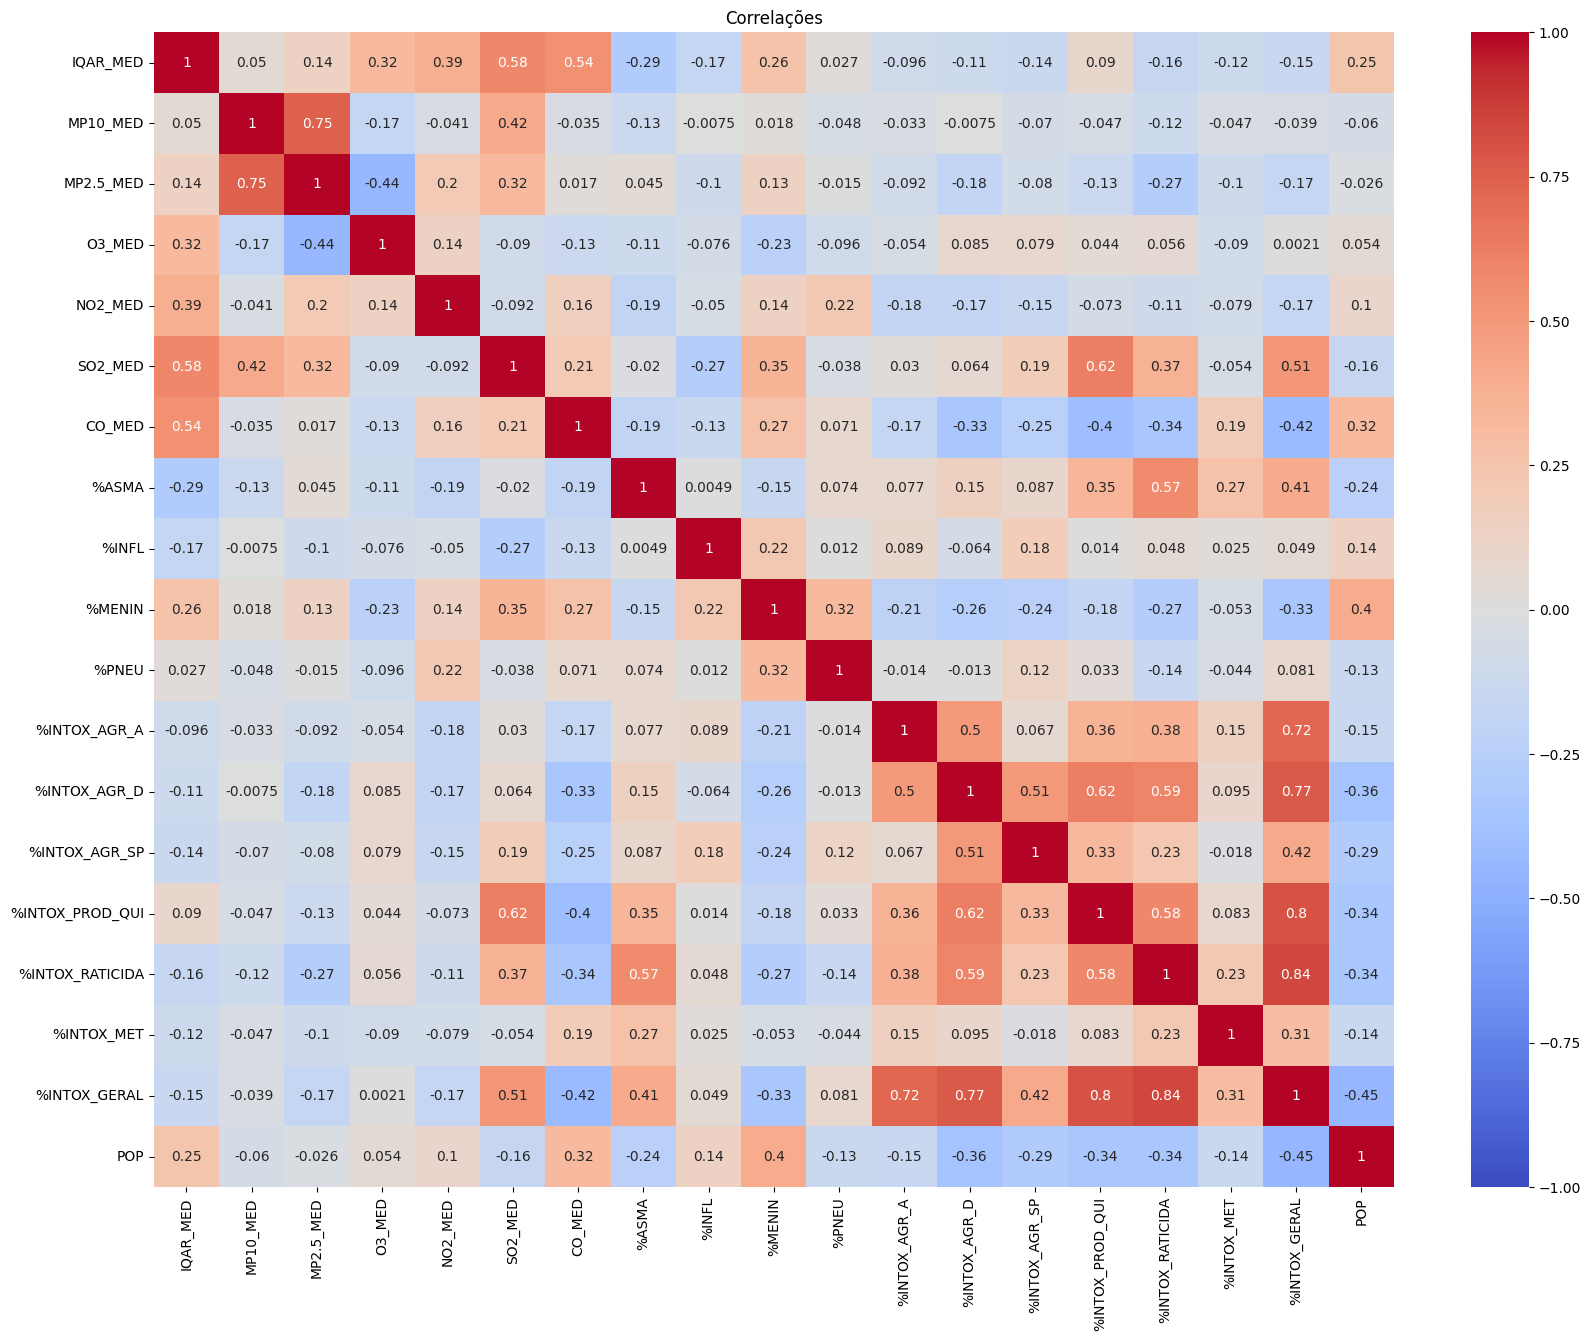

In [53]:
analise = tabela_de_analise[['IQAR_MED','MP10_MED','MP2.5_MED','O3_MED','NO2_MED','SO2_MED','CO_MED',
                             '%ASMA','%INFL','%MENIN','%PNEU',
                             '%INTOX_AGR_A','%INTOX_AGR_D','%INTOX_AGR_SP','%INTOX_PROD_QUI','%INTOX_RATICIDA','%INTOX_MET','%INTOX_GERAL',
                             'POP'
                             ]]


matriz_correlacao = analise.select_dtypes(include='number').corr()
plt.figure(figsize=(20, 15))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlações')
plt.show()


### Análise localizada

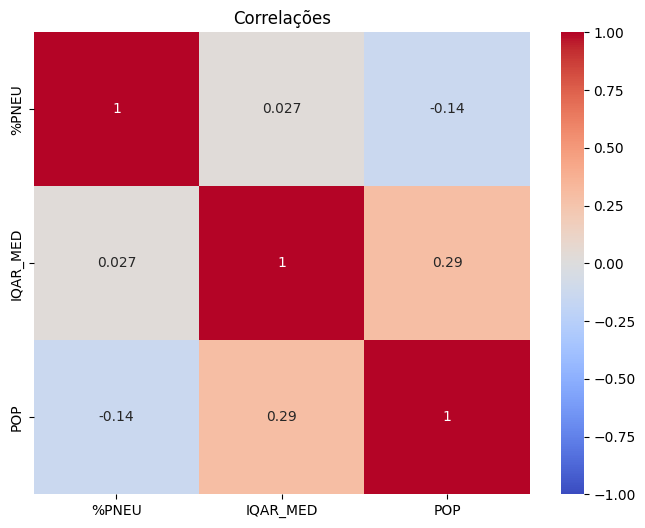

%PNEU  IQAR_MED      POP
1    5.390115e-07   8.89563   309208
2    5.390115e-07  13.47870   309208
3    5.390115e-07   4.58083   309208
13   1.095436e-05  14.22900  2530701
14   1.095436e-05  13.51630  2530701
..            ...       ...      ...
137  1.278373e-06  20.45520   695328
141  7.481121e-07  11.05730   148522
142  7.481121e-07  12.10470   148522
143  6.167414e-06  10.95490  1963726
144  6.192829e-07  22.63330   358838

[90 rows x 3 columns]

In [97]:
analise = tabela_de_analise[['%PNEU','IQAR_MED','POP']]

analise = analise.dropna(axis=0)


matriz_correlacao = analise.select_dtypes(include='number').corr()
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlações')
plt.show()

analise